# Quadraturformeln

Ziel ist es numerisch $\int_{a}^{b}f(x)dx$ zu berechnen. Dadurch macht man zuerst eine Zerlegung des Integrationsintervalls in Teilintervalle $[a,b]$, mit $N$ Teilungspunkten


Eine Allgemeine Quadraturformel ist gegeben durch $\int_{0}^{1}g(\tau)d\tau \approx \sum_{i=1}^sb_i g(c_i)$

## Trapezregel

Die Trapezregel berechnet für jedes der Teilintervalle die Fläche des Trapezes damit $h = \frac{f(x_i)+f(x_{i+1})}{2}$

$\int_{a}^{b}f(x)dx \approx \sum_{i=0}^{n-1} h \frac{f(x_i)+f(x_{i+1})}{2}$

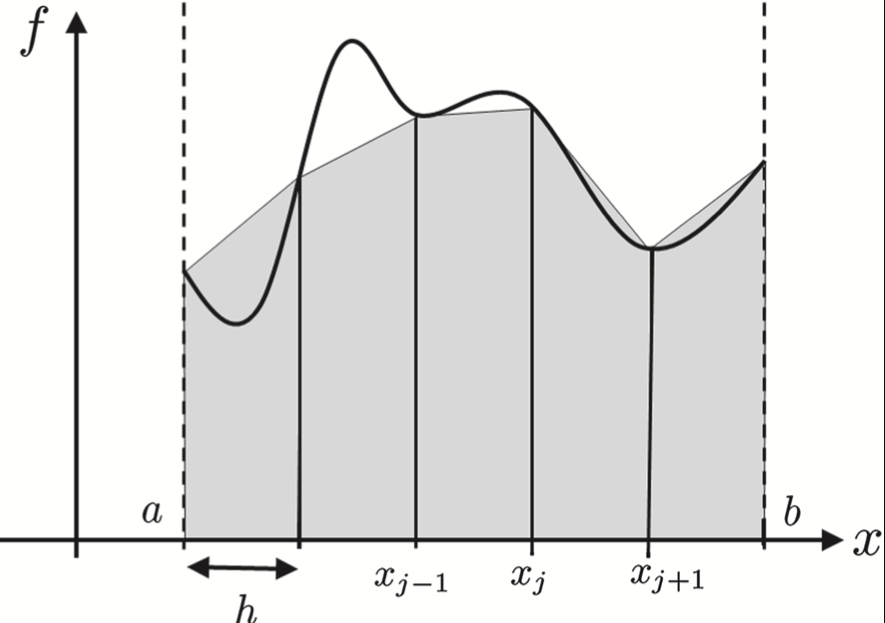

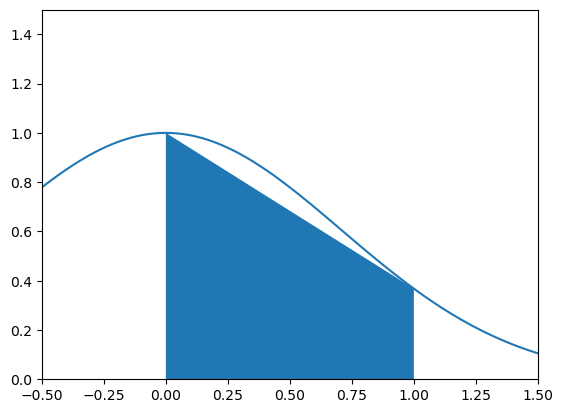

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-0.5,1.5,100)
y = np.exp(-x**2)
plt.plot(x,y)

x0 = 0; x1 = 1;
y0 = np.exp(-x0**2); y1 = np.exp(-x1**2);
plt.fill_between([x0,x1],[y0,y1])

plt.xlim([-0.5,1.5]); plt.ylim([0,1.5]);
plt.show()

In [5]:
def trapz(f,a,b, N = 50):
    """
    Approximates a given integral using the trapezoidal rule
    """
    x = np.linspace(a,b,N+1) # N+1 points to make N subintervals
    y = f(x)
    y_right = y[1:] # take all from idx 1 onwards
    y_left = y[:-1] # take all from 0 -> n-1 element

    dx = (b-a)/N #similar to h in script

    T = (dx/2)*np.sum(y_right + y_left)
    return T

trapz(np.sin,0,np.pi/2,100)

0.9999794382396074

Für eine Quadraturformel gilt also folgendes man hat eine Transformation auf $[0,1]$ durchgeführt durch $g(\tau)=f(x_j + \tau h_j)$

$\int_{x_j}^{x_{j+1}} f(x)dx = h_j \int_0^1 g(\tau)d\tau \approx h_j \sum_{i=1}^s b_ig(c_i) = h_j \sum_{i=1}^s b_i f(x_j + c_ih_j)$

Damit als Näherungsformel für die Implementation

$\int_a^b f(x)dx = \sum_{j=0}^{N-1}\int_{x_j}^{x_{j+1}}f(x)dx \approx \sum_{j=0}^{N-1}h_j \sum_{i=1}^s b_if(x_j + c_ih_j)$


In [4]:
import numpy as np

def f(x):
    return np.cos(x)*np.exp(np.sin(x))


def linke_rechtecksregel(f,a,b,N):
    # Zuerst berechnen wir h und splitten das Integrationsintervall in N Teile
    # Dazu verwenden wir numpy.linspace was ein Intervall in N teile aufteilt
    x_vals = np.linspace(a,b,N)
    
    # nun ist für die linke Rechtecksregel
    b1 = 1
    c1 = 0
    
    # Wir verwenden numpy.diff um uns die n-th diskreten Differenzen von h zu berechnen
    # out[i] = a[i+1] - a[i] das Funktioniert rekursiv
    h_vals = np.diff(x_vals)

    interval_results = []
    for j in range(0,N-1):
        result = h_vals[j] * b1*f(x_vals[j])
        interval_results.append(result)
    
    # Final result is the sum over all the intervalls
    return np.sum(interval_results)
    
def mittelpunktsregel(f,a,b,N):
    x_vals = np.linspace(a,b,N)
    b1 = 1
    c1 = 0.5
    h_vals = np.diff(x_vals)
    interval_result = []
    for j in range(0,N-1):
        result = h_vals[j]*b1*f(x_vals[j]+c1*h_vals[j])
        interval_result.append(result)
    return np.sum(interval_result)

def simpsonregel(f,a,b,N):
    x_vals = np.linspace(a,b,N)
    bi = [1/6, 2/3, 1/6]
    ci = [0, 1/2, 1]
    h_vals = np.diff(x_vals)
    interval_result = []
    for j in range(0,N-1):
        first_sum = []
        for i in range(0,3):
            result= bi[i] * f(x_vals[j]+ci[i]*h_vals[j])
            first_sum.append(result)
        interval_result.append((h_vals[j]*np.sum(first_sum)))
        
        #interval_result.append(result)
    return np.sum(interval_result)

print("Ergebnis der linken Rechtecksregel: ",linke_rechtecksregel(f,0,3,10000))
print("Ergebnis der Mittelpunktsregel: ", mittelpunktsregel(f,0,3,10000))
print("Ergebnis der Simpson-Regel: ",simpsonregel(f,0,3,10000))

Ergebnis der linken Rechtecksregel:  0.15188387414930815
Ergebnis der Mittelpunktsregel:  0.1515628366416064
Ergebnis der Simpson-Regel:  0.15156283651453484


# Genauigkeit der Quadraturformeln

Durch ein Genauigkeits-Aufwands Diagramm kann man die Genauigkeit einer gegebenen Quadraturformel untersuchen.

Man plottet hier den Fehler, gegen die benötigten Funktionsauswertungen $fe = s*N$

Facts:

+ Kurven sind gerade so lange man nicht in den Bereich von Rundungsfehler kommt
+ Man hat jeweils einen Anstieg $-1/p$ wobei p die Ordnung ist
+ Die Formeln mit höherer Ordnung sind genauer

0.15156283651453495


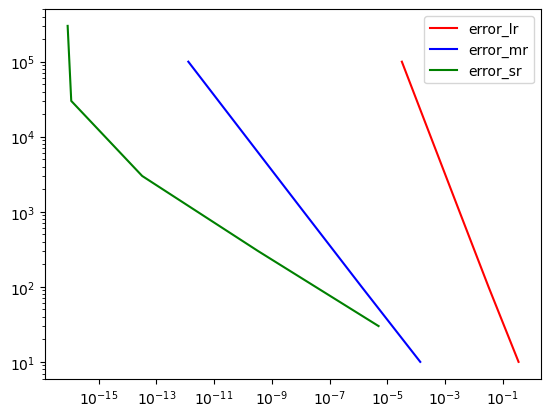

In [6]:
import matplotlib.pyplot as plt
import numpy as np

analytical_value = np.exp(np.sin(3)) - 1

print(analytical_value)

# Nehme nun N values
n_vals = np.array([10, 100, 1000, 10000, 100000])

# Leere Listen um die Error werte zu appenden

# Nun erstellen wir uns 1D arrays um unsere Werte zu speichern

error_lr = np.zeros(len(n_vals))
error_mr = np.zeros(len(n_vals))
error_sr = np.zeros(len(n_vals))
for i in range(0,len(n_vals)):
    error_lr[i] = abs(linke_rechtecksregel(f,0,3,n_vals[i]) - analytical_value)
    error_mr[i] = abs(mittelpunktsregel(f,0,3,n_vals[i]) - analytical_value)
    error_sr[i] = abs(simpsonregel(f,0,3,n_vals[i])-analytical_value)
    
# nun polotten wir die in den gleichen graphen
plt.plot(error_lr,n_vals, color ="red",label ="error_lr")
plt.plot(error_mr,n_vals, color ="blue",label ="error_mr")
plt.plot(error_sr, 3*n_vals, color="green", label="error_sr")

# Zudem hat man in matplotlib mit xscale und yscale gleich die Option automatisch die Achsen zu skalierne

plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.show()


# Superkonvergenz und orthogonale Polynome

**Definition Gewichtsfunktion**

Eine Gewichtsfunktion $\omega: (a,b)\to \mathbb{R}$ erfüllt:

1. $\forall x \in (a,b)$ gilt $\omega(x) > 0$
2. $\forall k \geq 0: \int_a^b \omega(x)|x|^k dx < \infty$ 

**Definition Orthogonal im Polynomraum**

Auf dem Vektorraum der Polynome mit reellen Koeffizienten definieren wir ein Skalarprodukt

$\langle f,g \rangle := \int_a^b \omega(x)f(x)g(x)dx$

Weiteres Definiert man für $f,g$: f ist orthogonal zu g $:\Leftrightarrow f \perp g \Leftrightarrow \langle f,g \rangle = 0$


## Implementation der Legendre Polynome

Diese sind definiert als

$P_k(x):= \frac{(-1)^k}{2^k k!}\frac{d^k}{dx^k}((1-x^2)^k)$

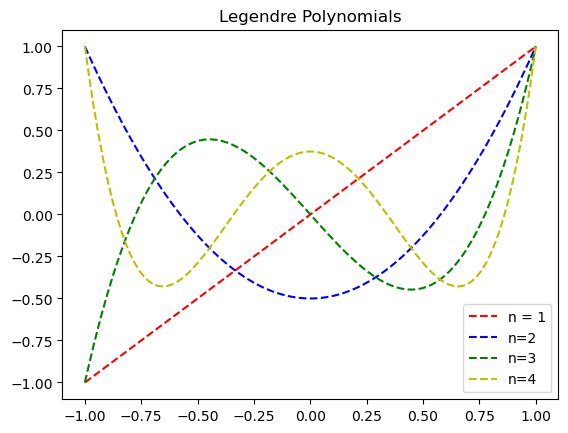

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

N = 100
x_vals = np.linspace(-1,1,N)

def Legendre(x,n):
    leg = legendre(n)
    P_n = leg(x)
    return P_n

func = Legendre(x_vals,1)
func1 = Legendre(x_vals,2)
func2 = Legendre(x_vals,3)
func3 = Legendre(x_vals,4)

plt.plot(x_vals,func, "r--",label = "n = 1")
plt.plot(x_vals,func1,"b--",label="n=2")
plt.plot(x_vals,func2,"g--", label="n=3")
plt.plot(x_vals,func3,"y--", label ="n=4")
plt.legend()
plt.title("Legendre Polynomials")
plt.show()


Man sieht hier schön das Die Nullstelle von $P_k$ alle Reel sind und im Intervall $[-1,1]] liegen

# Gaussche Quadraturformel

Sei $\omega$ eine Gewichtsfunktion auf $(a,b)$, $p_s(x)$ das zu $\omega$ gehörige orthogonale Polynom vom Grad $s$ mit Nullstellen $c_1,...,c_n$. Betrachte die folgende Quadraturformel

$\int_a^b \omega(x)f(x)dx \approx \sum_{i=1}^s b_i f(c_i)$

Man wählt die Gewichte $b_i = b_i(\omega,a,b)$ so dass die Formel für alle Polynome vom Grad kleiner gleich $s-1$ exakt ist

$\sum_{i=1}^s b_ip_k{c_i} = \sum_{a}^b \omega(x)p_k(x)dx = \langle p_k 1 \rangle$

Klar ist hier $\langle p_0, 1$  und $0$ für $k=1,..,s-1$ (orthogonalität)

## Gauss-Legendre Quadratur

Man hat hier $\gamma_1 ... \gamma_s$ als die Nullstellen des Legendre Polynoms $P_s(x)$ auf dem Intervall $(-1,1)$. Man setze $c_i := \frac{1}{2}(1+\gamma_i)$ als die Knoten

Der Satz 1.34 gibt uns die Existenz einer solchen eindeutigen Quadratur für alle $s \in \mathbb{N}$

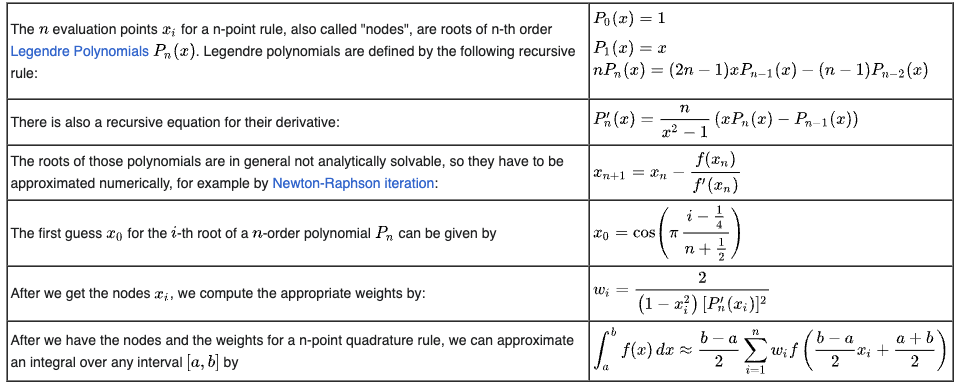

In [23]:
import numpy as np

# func is a function that takes a list-like input values
def gauss_legendre_integrate(func, domain, deg):
    x, w = np.polynomial.legendre.leggauss(deg)
    s = (domain[1] - domain[0])/2
    a = (domain[1] + domain[0])/2
    return np.sum(s*w*func(s*x + a))

for d in range(3, 10):
    print(d, gauss_legendre_integrate(np.exp, [-3, 3], d))

3 19.853691996805587
4 20.028688395290693
5 20.035577718385575
6 20.035746975092323
7 20.03574981972664
8 20.035749854494522
9 20.03574985481744


# Konvergenzbeschleunigung von Folgen

Gegeben ist hier eine Fogle $\{S_1,...S_n\}$ welche nur langsam gegen ihren Grenzwert $S$ konvergiert. Dies kann beispielsweise bei Integranden mit Singularitäten passieren $T_n \to -\frac{4}{9} = \int_0^1 \sqrt{x}\log{x}dx$ konvergiert zb ebenfalls sehr langsam.

## Prozess von Aitken

Man hat eine Folge mit folgender Einschränkung

$S_{n+1} - S \approx \sigma(S_n - S) \approx \sigma^n(S_1 - S)$

Man kann hier zwei Gleichungen anschreiben 

+ $S_{n+1} - S = \sigma(S_n - S)$
+ $S_{n+2} - S = \sigma(S_{n+1}-S)$

Definiere die Vorwärtsdifferenzen

$\Delta S_n = S_{n+1} - S_n$

beobachte (Umformungschritte im Skript) dass $S = S_{n+1} - \frac{\Delta S_{n+1}\cdot \Delta S_n}{\Delta S_{n+1}-\Delta S_n}$

Durch die zweite Vorwärtsdifferenz $\Delta^2 S_n = \Delta(\Delta S_n) = \Delta S_{n+1} - \Delta S_n$

gilt $S'_n := S_{n+1} - \frac{\Delta S_{n+1} \cdot \Delta S_n}{\Delta^2 S_n}$
  

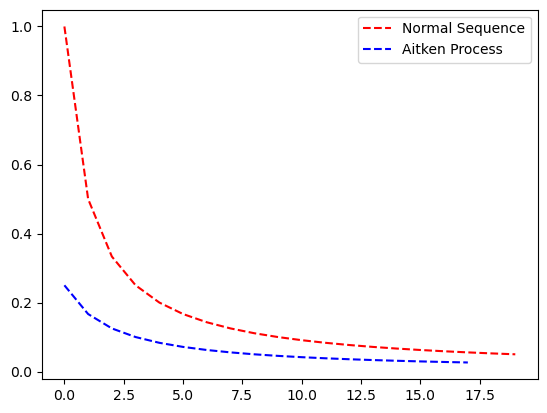

In [24]:
import numpy as np

import matplotlib.pyplot as plt

def aitken_delta_squared(S):
    """ 
    Uses the Aitken Delta Squared Process to speed up conergence

    Args:
         given sequence
    """
    n = len(S)
    S_prime = np.zeros(n-2)

    for i in range(n-2):
        delta_S_n = S[i+1] - S[i]
        delta_S_n_1 = S[i+2]-S[i+1]
        delta2_S_n = delta_S_n_1 - delta_S_n

        # check to not divide with zero
        if delta2_S_n !=0:
            S_prime[i] = S[i+1] - (delta_S_n_1 * delta_S_n)/delta2_S_n

    return S_prime

# Make an Example Sequence

def sequence(n):
    return 1/(n+1)

n = 20


S = np.array([sequence(i) for i in range(n)])

S_prime = aitken_delta_squared(S)

plt.plot(range(n),S, "r--", label="Normal Sequence")
plt.plot(range(n-2),S_prime,"b--",label="Aitken Process")
plt.legend()
plt.show()
        

# Epsilon Algorithm

We have a sequence $\{ S_1,S_2,... \}$ and one defines:

+ $\epsilon_{-1}^{(n)}:= 0$
+ $\epsilon_0^{(n)}:= S_n$
+ $\epsilon^{(n)}_{k+1}:= \epsilon_{k-1}^{(n+1)} + \frac{1}{\epsilon_k^{(n+1)}-\epsilon_k^{(n)}}$

Then $\epsilon_2^{(n)}= S'_n, \epsilon_4^{(n)} = S''_n, \epsilon^{(n)}_{6} = S'''_n$

In [34]:
import numpy as np

# This function defines one elemnt of the series
def S_1(n):
    i_n = np.arange(1, n + 1)
    return sum((-1)**(i_n + 1) / i_n)



def e_alg(nmax, Series):
    kmax = 2 * nmax + 1  
    res = np.zeros((kmax, kmax))  # Create a kmax x kmax matrix

    e_0 = np.zeros((kmax))
 
    # So with .shape we make an iterator from 0 - column lengh
    for col in range(res.shape[1]):
        for i in range(kmax-col):
            if col == 0:
                # because i = 0 we need to add + 1
                res[i,col] = Series(i + 1)
            elif col == 1:
                # For the first column we need e_0 
                res[i,col] = 1/(res[i+1,col-1]-res[i,col-1])
            else:
                res[i,col] = res[i+1,col-2]  + 1/(res[i+1,col-1] - res[i,col-1])
    return res

# Define n for the maximum number of iterations
n = 8

# Compute the result using epsilon algorithm
e_res = e_alg(n, S_1)



# Display the table
print("log(2):", np.log(2))

# Then we slice every second collumns

second_rows = e_res[:,::2]

print("--------------------------------- Epsilon Matrix ------------------------------------------------------")

for row in second_rows:
    print(" | ".join(f"{elem:.8f}" for elem in row))


i,j = np.indices(e_res)

log(2): 0.6931471805599453
--------------------------------- Epsilon Matrix ------------------------------------------------------
1.00000000 | 0.70000000 | 0.69333333 | 0.69315245 | 0.69314733 | 0.69314718 | 0.69314718 | 0.69314718 | 0.69314718
0.50000000 | 0.69047619 | 0.69308943 | 0.69314574 | 0.69314714 | 0.69314718 | 0.69314718 | 0.69314718 | 0.00000000
0.83333333 | 0.69444444 | 0.69316940 | 0.69314766 | 0.69314719 | 0.69314718 | 0.69314718 | 0.69314718 | 0.00000000
0.58333333 | 0.69242424 | 0.69313725 | 0.69314700 | 0.69314718 | 0.69314718 | 0.69314718 | 0.00000000 | 0.00000000
0.78333333 | 0.69358974 | 0.69315213 | 0.69314726 | 0.69314718 | 0.69314718 | 0.69314718 | 0.00000000 | 0.00000000
0.61666667 | 0.69285714 | 0.69314450 | 0.69314714 | 0.69314718 | 0.69314718 | 0.00000000 | 0.00000000 | 0.00000000
0.75952381 | 0.69334734 | 0.69314873 | 0.69314720 | 0.69314718 | 0.69314718 | 0.00000000 | 0.00000000 | 0.00000000
0.63452381 | 0.69300334 | 0.69314623 | 0.69314717 | 0.69314718 |

TypeError: only integer scalar arrays can be converted to a scalar index

# Double Integral

Goal is to calculate the Double Integral $\iint_B f(x,y)d(x,y)$

For this we apply a iterated Quadrature Rule

$\iint_B f(x,y)d(x,y) \approx \sum_{j=0}^{N-1}h_j \sum_{i=1}^{s}b_i \sum_{\mu=0}^{M(i,j)-1}k_\mu \sum_{\nu = 1}^{\tilde{s}}\tilde{b}_\nu f(x_j +c_ih_j, y_\mu + \tilde{c}_\nu k_\mu)$

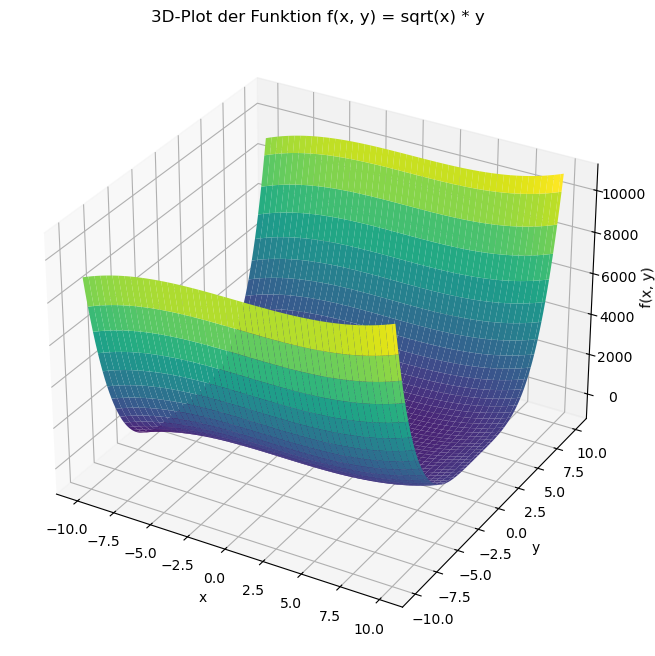

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example_function 


def f(x,y):
    return x**3 + y**4

x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

# Erstellen des 3D-Plots
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Plot-Einstellungen
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D-Plot der Funktion f(x, y) = sqrt(x) * y')

plt.show() 

In [ ]:
def double_integral_quadrature(f,x_intervals)